### Importam els 2 datasets

In [184]:
import pandas as pd

dades_lloguer = pd.read_csv(r'C:\Users\Maria\OneDrive - UAB\Documentos\Jump2Digital\Prova data science\Dades\2017_lloguer_preu_trim.csv')
dades_lloguer.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99
1,2017,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),905.26
2,2017,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),722.78
3,2017,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),895.28
4,2017,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),871.08


In [185]:
dades_soroll = pd.read_csv(r'C:\Users\Maria\OneDrive - UAB\Documentos\Jump2Digital\Prova data science\Dades\2017_poblacio_exposada_barris_mapa_estrategic_soroll_bcn_long.csv')
dades_soroll.head()

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Concepte,Rang_soroll,Valor
0,1,Ciutat Vella,1,el Raval,TOTAL_D,<40 dB,7.73%
1,1,Ciutat Vella,1,el Raval,TOTAL_D,40-45 dB,26.98%
2,1,Ciutat Vella,1,el Raval,TOTAL_D,45-50 dB,7.38%
3,1,Ciutat Vella,1,el Raval,TOTAL_D,50-55 dB,11.97%
4,1,Ciutat Vella,1,el Raval,TOTAL_D,55-60 dB,19.85%


In [186]:
dades_lloguer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             584 non-null    int64  
 1   Trimestre       584 non-null    int64  
 2   Codi_Districte  584 non-null    int64  
 3   Nom_Districte   584 non-null    object 
 4   Codi_Barri      584 non-null    int64  
 5   Nom_Barri       584 non-null    object 
 6   Lloguer_mitja   584 non-null    object 
 7   Preu            546 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 36.6+ KB


In [187]:
dades_soroll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18980 entries, 0 to 18979
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Codi_Districte  18980 non-null  int64 
 1   Nom_Districte   18980 non-null  object
 2   Codi_Barri      18980 non-null  int64 
 3   Nom_Barri       18980 non-null  object
 4   Concepte        18980 non-null  object
 5   Rang_soroll     18980 non-null  object
 6   Valor           18980 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.0+ MB


Podem apreciar que el que més soroll causa al raval és el transit

### Preprocessament

Podem visualitzar quins valors pot prendre la columna de rang de soroll i de concepte

In [188]:
dades_soroll.Rang_soroll.unique()

array(['<40 dB', '40-45 dB', '45-50 dB', '50-55 dB', '55-60 dB',
       '60-65 dB', '65-70 dB', '70-75 dB', '75-80 dB', '>=80 dB'],
      dtype=object)

In [189]:
dades_soroll.Concepte.unique()

array(['TOTAL_D', 'TOTAL_E', 'TOTAL_N', 'TOTAL_DEN', 'TRANSIT_D',
       'TRANSIT_E', 'TRANSIT_N', 'TRANSIT_DEN', 'GI_TR_D', 'GI_TR_E',
       'GI_TR_N', 'GI_TR_DEN', 'FFCC_D', 'FFCC_E', 'FFCC_N', 'FFCC_DEN',
       'INDUST_D', 'INDUST_E', 'INDUST_N', 'INDUST_DEN', 'VIANANTS_D',
       'VIANANTS_E', 'OCI_N', 'PATIS_D', 'PATIS_E', 'PARCS_D'],
      dtype=object)

In [190]:
len(dades_soroll.Concepte.unique())*len(dades_soroll.Rang_soroll.unique())

260

Cada barri te 260 files una per cada combianció de concepte i rang de soroll

In [191]:
# Feim que la columna 'Valor' de dades_soroll sigui float
dades_soroll['Valor'] = dades_soroll['Valor'].str.replace('%','').astype(float)

Per juntar els 2 datasets podem afegir al dataset del preu de les cases per barri el soroll per cada concepte aixo requereix 
1. processar el dataset del soroll per a tenir la informació agrupada per barris, de manera que tinguem una fila per barri i una columna per cada parella de concepte-rang
2. afegir 260 columnes més per cada fila al dataset principal

In [ ]:
# Per cada barri, creem una columna per cada rang de soroll i per cada concepte
dades_sorollxBarri = dades_soroll[['Nom_Barri', 'Concepte', 'Rang_soroll', 'Valor']]

for rang_soroll in dades_sorollxBarri.Rang_soroll.unique():
    for concepte in dades_sorollxBarri.Concepte.unique():
        dades_sorollxBarri.loc[(dades_sorollxBarri.Rang_soroll == rang_soroll) & (dades_sorollxBarri.Concepte == concepte), rang_soroll + '_' + concepte] = dades_sorollxBarri.Valor

dades_sorollxBarri.drop(['Concepte', 'Rang_soroll', 'Valor'], axis=1, inplace=True)
dades_sorollxBarri = dades_sorollxBarri.groupby('Nom_Barri').max()

In [193]:
dades_sorollxBarri.head()

,<40 dB_TOTAL_D,<40 dB_TOTAL_E,<40 dB_TOTAL_N,<40 dB_TOTAL_DEN,<40 dB_TRANSIT_D,<40 dB_TRANSIT_E,<40 dB_TRANSIT_N,<40 dB_TRANSIT_DEN,<40 dB_GI_TR_D,<40 dB_GI_TR_E,...,>=80 dB_INDUST_D,>=80 dB_INDUST_E,>=80 dB_INDUST_N,>=80 dB_INDUST_DEN,>=80 dB_VIANANTS_D,>=80 dB_VIANANTS_E,>=80 dB_OCI_N,>=80 dB_PATIS_D,>=80 dB_PATIS_E,>=80 dB_PARCS_D
Nom_Barri,,,,,,,,,,,,,,,,,,,,,
Baró de Viver,0.00,0.00,8.23,0.00,0.00,0.00,8.27,0.00,0.00,0.99,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Can Baró,21.39,28.18,41.37,12.77,22.01,28.37,41.37,13.05,94.27,95.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Can Peguera,0.49,9.36,17.28,0.27,4.93,9.36,17.28,0.36,99.82,99.82,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Canyelles,0.85,2.83,21.78,0.42,0.85,2.83,21.78,0.42,37.04,46.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ciutat Meridiana,7.95,9.72,26.70,5.97,8.23,9.76,26.77,5.97,39.40,44.71,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [194]:
# Ens assegurem que la suma de tots els percentatges per barri dona 100
dades_sorollxBarri.sum(axis=1) / dades_soroll.Concepte.nunique()

Nom_Barri
Baró de Viver                    100.0
Can Baró                         100.0
Can Peguera                      100.0
Canyelles                        100.0
Ciutat Meridiana                 100.0
                                 ...  
la Vila Olímpica del Poblenou    100.0
la Vila de Gràcia                100.0
les Corts                        100.0
les Roquetes                     100.0
les Tres Torres                  100.0
Length: 73, dtype: float64

In [195]:
# Feim un nou dataframe amb les dades de lloguer i les dades de soroll per barri
dades_lloguer_soroll = pd.merge(dades_lloguer, dades_sorollxBarri, left_on='Nom_Barri', right_on='Nom_Barri', how='left')
dades_lloguer_soroll.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,<40 dB_TOTAL_D,<40 dB_TOTAL_E,...,>=80 dB_INDUST_D,>=80 dB_INDUST_E,>=80 dB_INDUST_N,>=80 dB_INDUST_DEN,>=80 dB_VIANANTS_D,>=80 dB_VIANANTS_E,>=80 dB_OCI_N,>=80 dB_PATIS_D,>=80 dB_PATIS_E,>=80 dB_PARCS_D
0,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,7.73,21.45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),905.26,4.27,8.45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),722.78,1.23,5.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),895.28,4.98,13.64,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),871.08,0.17,0.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [196]:
# miram quans valors nuls hi ha
print(f"Hi ha un total de {dades_lloguer_soroll.isnull().sum().sum()} valors nuls")

Hi ha un total de 38 valors nuls


In [197]:
# Com hi ha molt pocs valors nuls, els eliminam
dades_lloguer_soroll.dropna(inplace=True)
print(f"Hi ha un total de {dades_lloguer_soroll.isnull().sum().sum()} valors nuls")

Hi ha un total de 0 valors nuls


In [198]:
dades_lloguer_soroll.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,<40 dB_TOTAL_D,<40 dB_TOTAL_E,...,>=80 dB_INDUST_D,>=80 dB_INDUST_E,>=80 dB_INDUST_N,>=80 dB_INDUST_DEN,>=80 dB_VIANANTS_D,>=80 dB_VIANANTS_E,>=80 dB_OCI_N,>=80 dB_PATIS_D,>=80 dB_PATIS_E,>=80 dB_PARCS_D
0,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,7.73,21.45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),905.26,4.27,8.45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),722.78,1.23,5.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),895.28,4.98,13.64,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),871.08,0.17,0.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [199]:
# Eliminem totes les columnes que no ens interessen
dades_lloguer_soroll.drop(['Nom_Districte', 'Nom_Barri'], axis=1, inplace=True)
dades_lloguer_soroll.head()

,Any,Trimestre,Codi_Districte,Codi_Barri,Lloguer_mitja,Preu,<40 dB_TOTAL_D,<40 dB_TOTAL_E,<40 dB_TOTAL_N,<40 dB_TOTAL_DEN,...,>=80 dB_INDUST_D,>=80 dB_INDUST_E,>=80 dB_INDUST_N,>=80 dB_INDUST_DEN,>=80 dB_VIANANTS_D,>=80 dB_VIANANTS_E,>=80 dB_OCI_N,>=80 dB_PATIS_D,>=80 dB_PATIS_E,>=80 dB_PARCS_D
0,2017,1,1,1,Lloguer mitjà mensual (Euros/mes),734.99,7.73,21.45,42.75,0.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017,1,1,2,Lloguer mitjà mensual (Euros/mes),905.26,4.27,8.45,46.24,1.66,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017,1,1,3,Lloguer mitjà mensual (Euros/mes),722.78,1.23,5.92,19.94,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017,1,1,4,Lloguer mitjà mensual (Euros/mes),895.28,4.98,13.64,43.70,0.31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017,1,2,5,Lloguer mitjà mensual (Euros/mes),871.08,0.17,0.17,24.12,0.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [200]:
# Passem totes les variables categoriques a variables numeriques utilitzant el sklearn LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in dades_lloguer_soroll.columns:
    if dades_lloguer_soroll[col].dtype == 'object':
        dades_lloguer_soroll[col] = le.fit_transform(dades_lloguer_soroll[col])

dades_lloguer_soroll.head()

,Any,Trimestre,Codi_Districte,Codi_Barri,Lloguer_mitja,Preu,<40 dB_TOTAL_D,<40 dB_TOTAL_E,<40 dB_TOTAL_N,<40 dB_TOTAL_DEN,...,>=80 dB_INDUST_D,>=80 dB_INDUST_E,>=80 dB_INDUST_N,>=80 dB_INDUST_DEN,>=80 dB_VIANANTS_D,>=80 dB_VIANANTS_E,>=80 dB_OCI_N,>=80 dB_PATIS_D,>=80 dB_PATIS_E,>=80 dB_PARCS_D
0,2017,1,1,1,0,734.99,7.73,21.45,42.75,0.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017,1,1,2,0,905.26,4.27,8.45,46.24,1.66,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017,1,1,3,0,722.78,1.23,5.92,19.94,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017,1,1,4,0,895.28,4.98,13.64,43.70,0.31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017,1,2,5,0,871.08,0.17,0.17,24.12,0.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [201]:
# comprovam si la columna 'Any' es necessaria
dades_lloguer_soroll['Any'].unique()

array([2017], dtype=int64)

In [202]:
# Com tan sols hi ha un valor, eliminam la columna
dades_lloguer_soroll.drop(['Any'], axis=1, inplace=True)

In [203]:
dades_lloguer_soroll.head()

,Trimestre,Codi_Districte,Codi_Barri,Lloguer_mitja,Preu,<40 dB_TOTAL_D,<40 dB_TOTAL_E,<40 dB_TOTAL_N,<40 dB_TOTAL_DEN,<40 dB_TRANSIT_D,...,>=80 dB_INDUST_D,>=80 dB_INDUST_E,>=80 dB_INDUST_N,>=80 dB_INDUST_DEN,>=80 dB_VIANANTS_D,>=80 dB_VIANANTS_E,>=80 dB_OCI_N,>=80 dB_PATIS_D,>=80 dB_PATIS_E,>=80 dB_PARCS_D
0,1,1,1,0,734.99,7.73,21.45,42.75,0.27,11.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,2,0,905.26,4.27,8.45,46.24,1.66,17.89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,3,0,722.78,1.23,5.92,19.94,0.50,1.79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,4,0,895.28,4.98,13.64,43.70,0.31,12.98,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,2,5,0,871.08,0.17,0.17,24.12,0.17,0.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Visualizació

La base de dades del preu del lloger als diferents barris ens deixa contenstar preguntes com: 
- Quina es la mitja del preu de lloger a Catalunya?
- Quins són els barris més cars i més barats per viure?


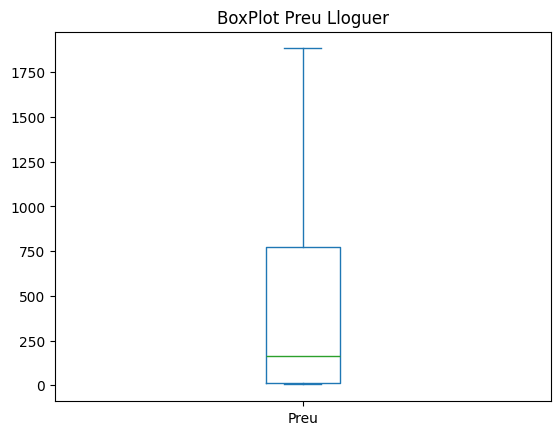

In [215]:
import matplotlib.pyplot as plt

dades_lloguer.plot(kind='box', y='Preu', title='BoxPlot Preu Lloguer')
plt.show()

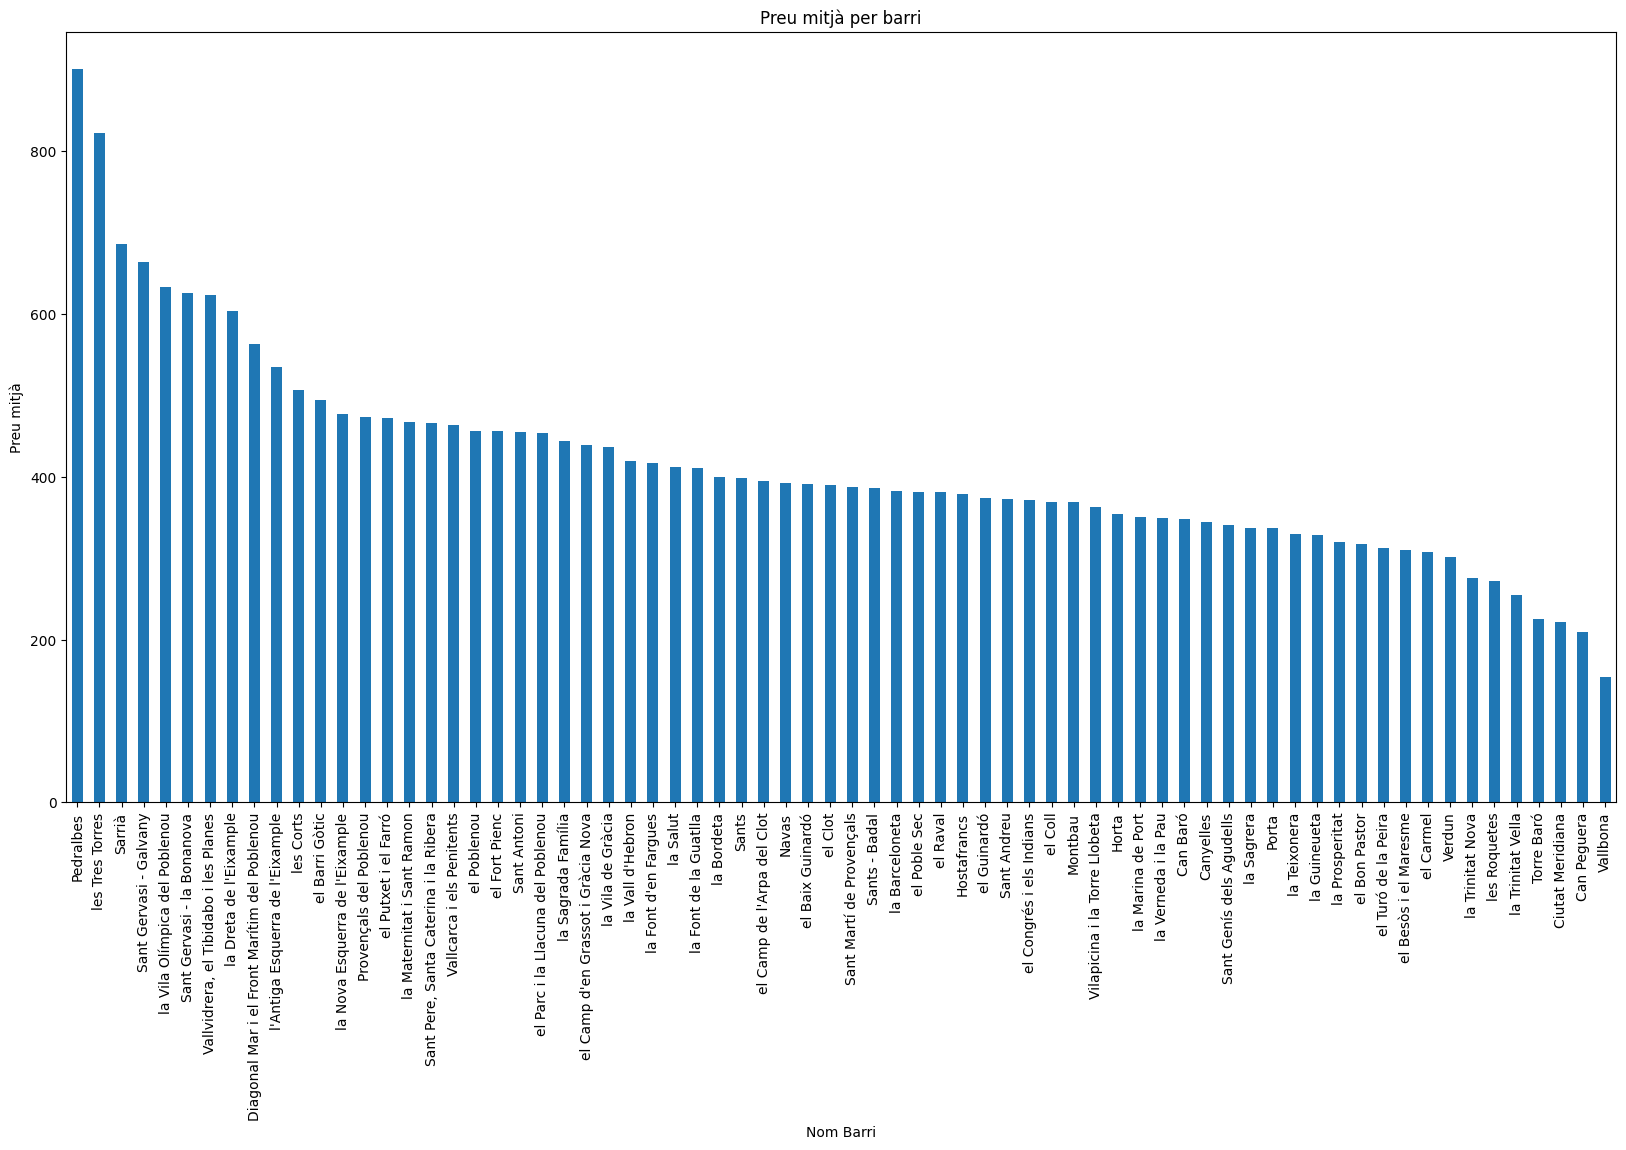

In [217]:
# eliminam els nan per poder fer el plot
dades_lloguer.dropna(inplace=True)

plt.figure(figsize=(20, 10))
dades_lloguer.groupby(['Nom_Barri'])['Preu'].mean().sort_values(ascending=False).plot(kind='bar', title='Preu mitjà per barri', xlabel='Nom Barri', ylabel='Preu mitjà')
plt.show()

La base de dades de soroll ens permet contestar preguntes com:
- Quin és el rang de soroll més comú a el Raval per a cada concepte?

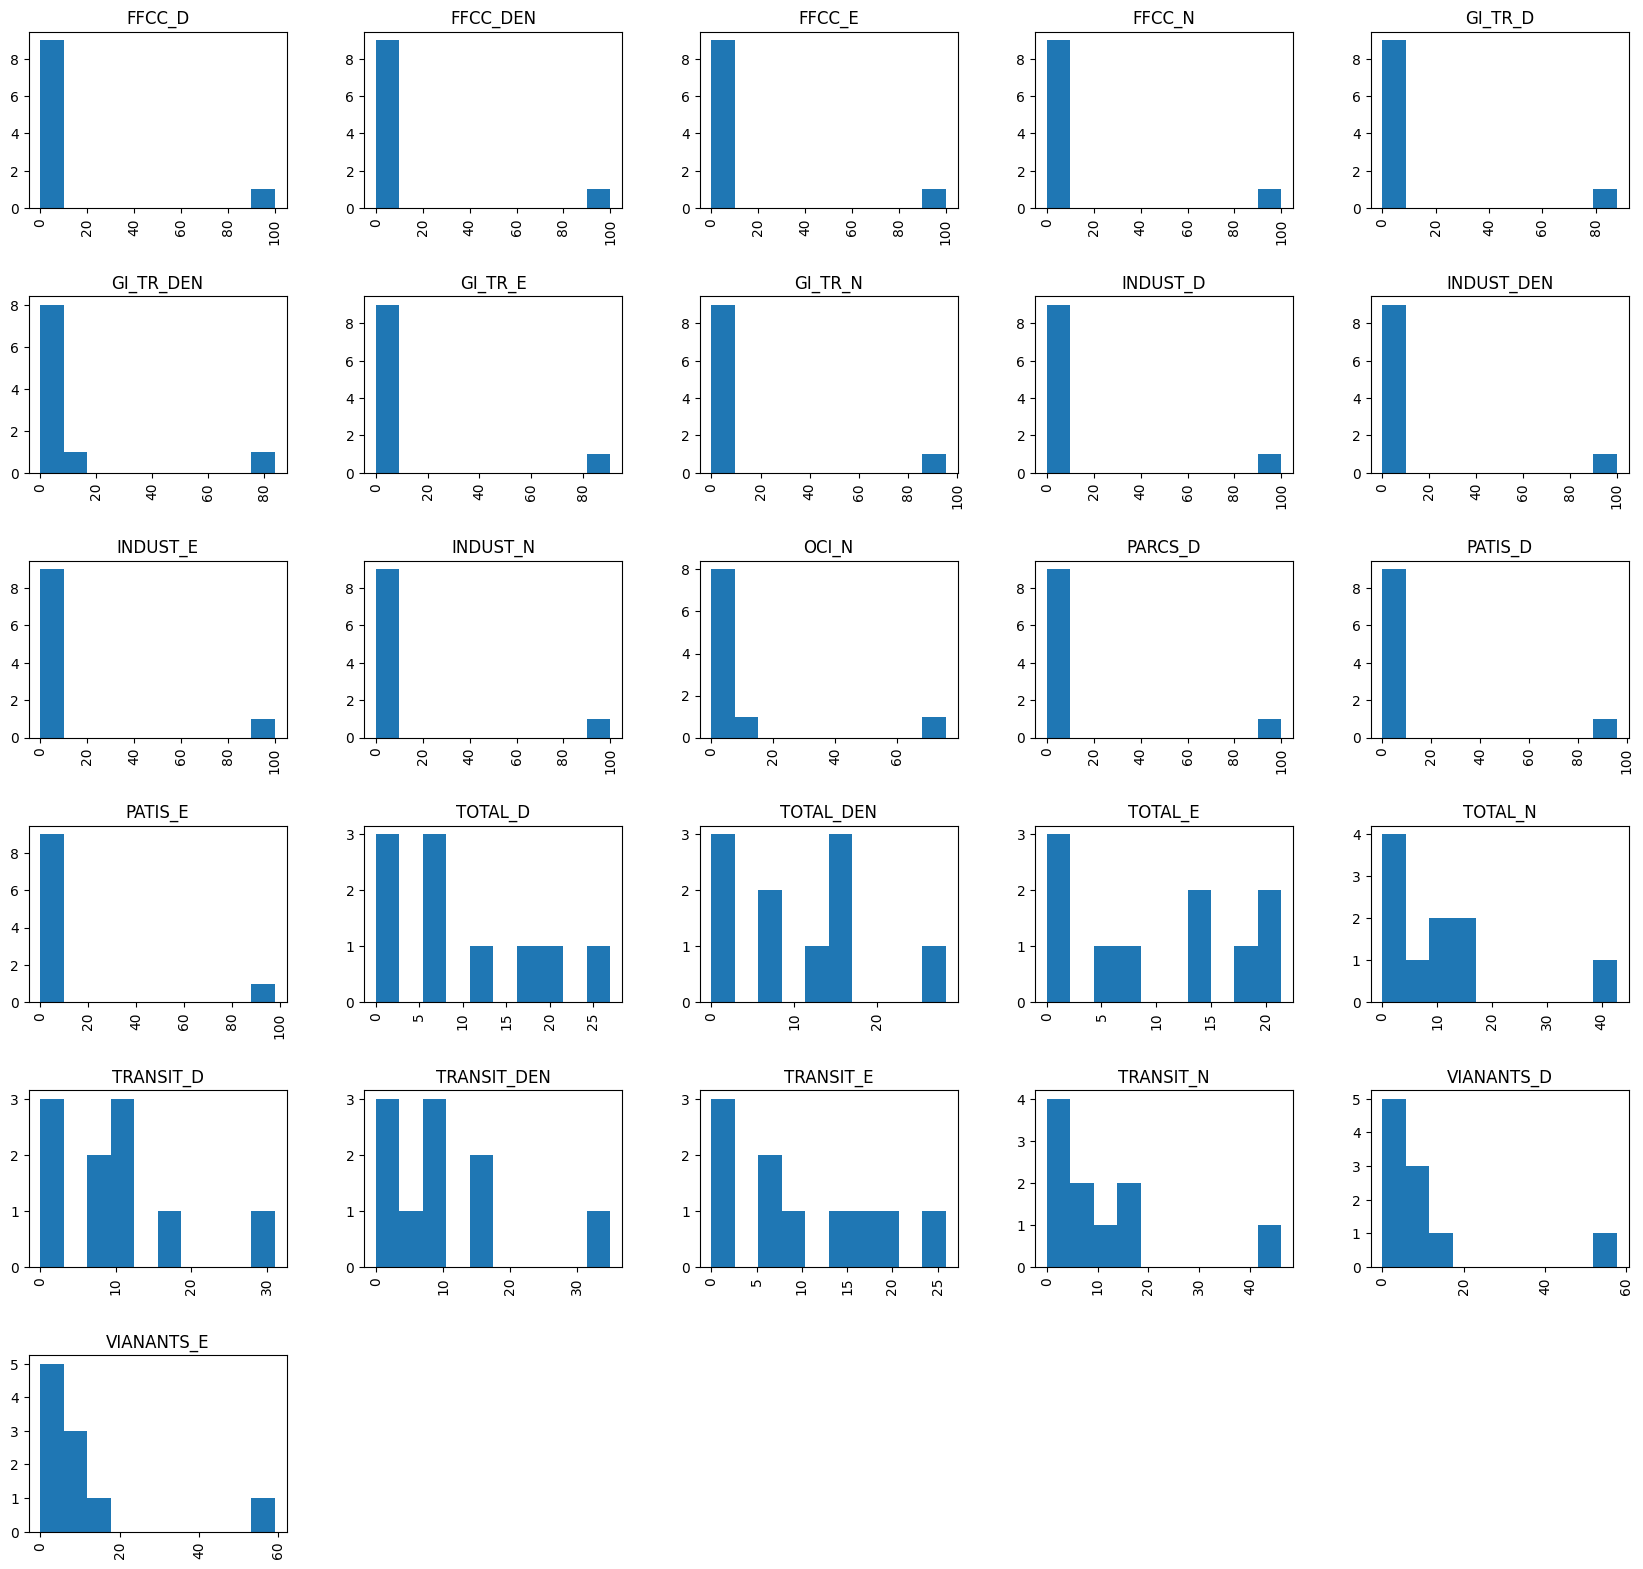

In [206]:
import matplotlib.pyplot as plt

dades_soroll[(dades_soroll['Nom_Barri'] == 'el Raval')].Valor.hist(by=dades_soroll.Concepte, figsize=(20,20))
plt.show()

### PCA

In [207]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def FPCA(SelectedData, boundary):
    scaler = StandardScaler()
    CentredData = scaler.fit_transform(SelectedData)
    
    k = 0;
    variance = 0
    while (variance < boundary):
        k += 1
        pca = PCA(n_components=k)
        ReducedData = pca.fit_transform(CentredData)
        variance += pca.explained_variance_ratio_[k-1]

    data_reduced = pd.DataFrame(ReducedData)
    return data_reduced

In [208]:
# apply PCA to reduce the number of columns
from sklearn.decomposition import PCA

pca = FPCA(dades_lloguer_soroll, 0.95)

print(f"El nombre de columnes ha passat de {dades_lloguer_soroll.shape[1]} a {pca.shape[1]} mantenguent el 95% de la variança")

El nombre de columnes ha passat de 265 a 25 mantenguent el 95% de la variança


Aixo vol dir que amb tansols 25 columnes podem explicar el 95% de la variança de les dades que abans tenia 265 columnes.

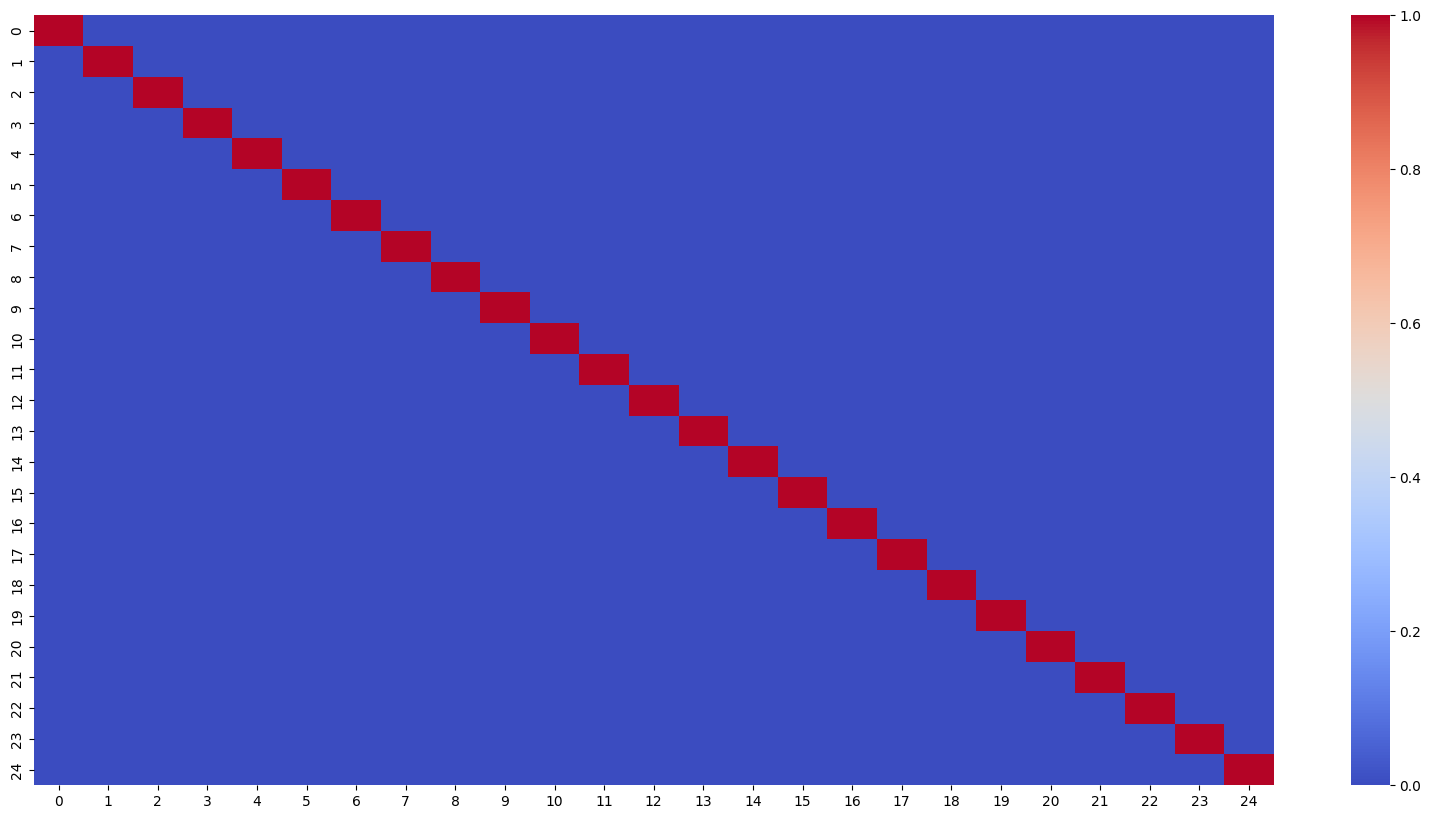

In [227]:
# Per ultim podem comprovar si hi ha alguna correlacio entre les variables
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.heatmap(pca.corr(), annot=False, cmap='coolwarm')
plt.show()

D'aqui podriem treure la conclusió de que no hi ha relació entre el preu mitja de cada barri i el soroll 

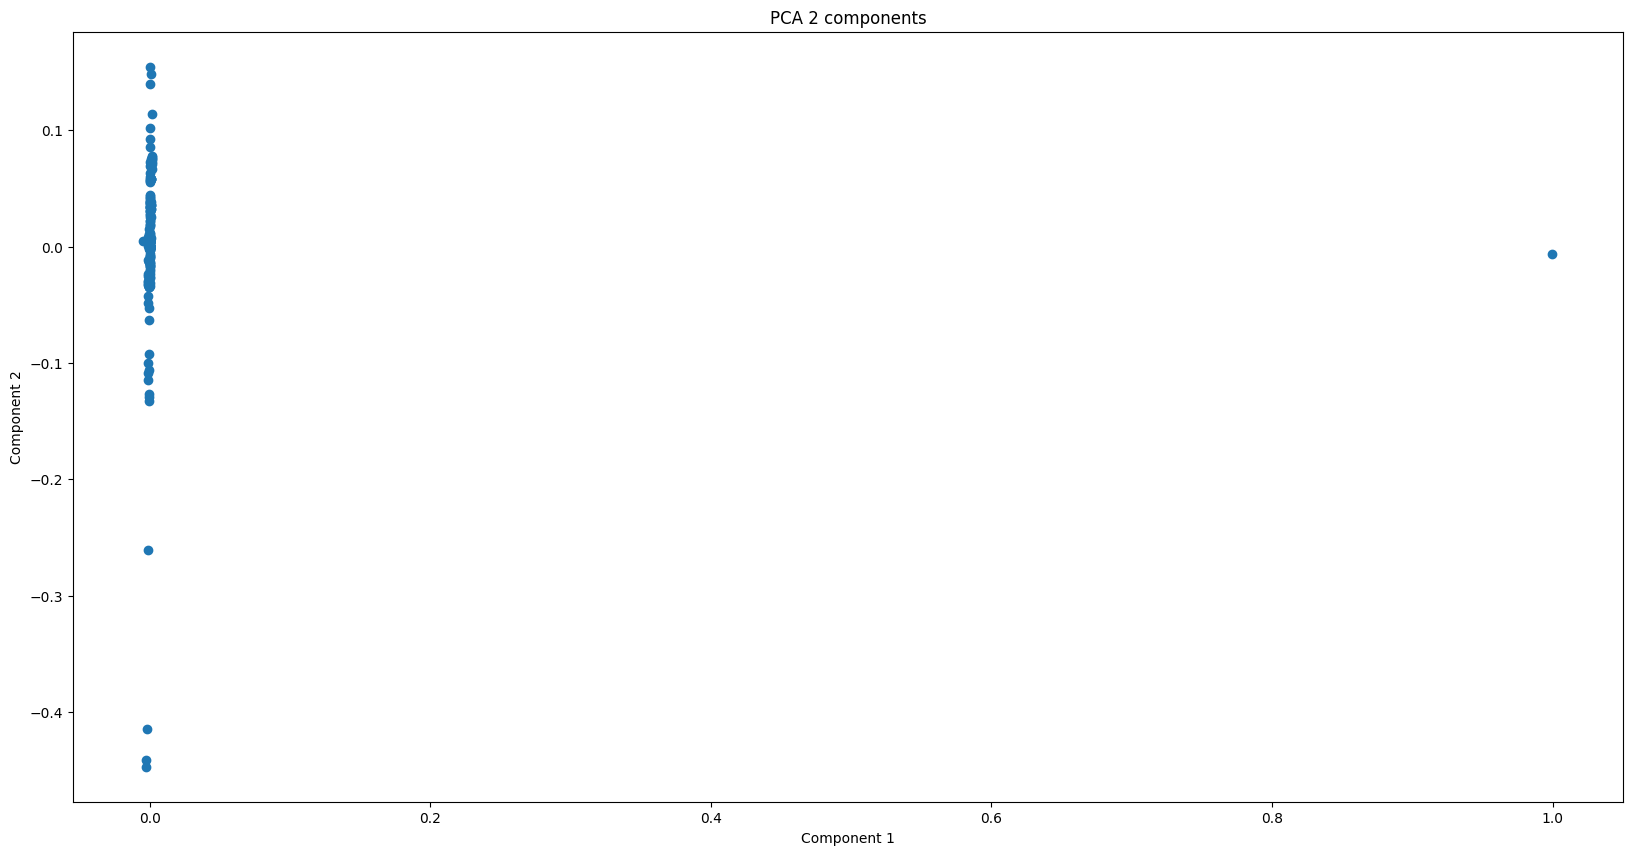

In [234]:
# També podem fer un PCA amb 2 components per poder visualitzar les dades en un grafic
pca2 = PCA(n_components=2)
pca2.fit(dades_lloguer_soroll)

plt.figure(figsize=(20, 10))
plt.scatter(pca2.components_[0], pca2.components_[1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA 2 components')
plt.show()

Al plot es pot veure que el component 1 no esta donant cap informacio util ja que tots els valors son practicament 0, també es pot veure clarament un outlier a la esquerra del grafic.